<a href="https://colab.research.google.com/github/mae001/Machine-Learning-projects/blob/main/task_classify_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

base_dir = 'task'
categories = ['me', 'barbara']
subdirs = ['train', 'validation']

for subdir in subdirs:
    for category in categories:
        path = os.path.join(base_dir, subdir, category)
        os.makedirs(path, exist_ok=True)

print(f"Created directory structure under {base_dir}")

Created directory structure under task


In [ ]:
!rm -rf /content/task/validation/.ipynb_checkpoints # secret class appeared in both validation and train folder which was not getting deleted so we forcefully deleted them

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_shape = (128, 128)
batch_size = 2

train_dir ='/content/task/train'
test_dir = '/content/task/validation'

# train_datagen = ImageDataGenerator(0/127.5 - 1, 255.0/127.5 - 1)
# test_datagen = ImageDataGenerator(0/127.5 - 1, 255.0/127.5 - 1)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print('Train images')
train_data_10_percent = train_datagen.flow_from_directory(directory = train_dir,
                                                        target_size = image_shape,
                                                        class_mode = 'binary',
                                                        batch_size = batch_size)


print('Test images')
test_data_10_percent = test_datagen.flow_from_directory(directory = test_dir,
                                                        target_size = image_shape,
                                                        class_mode = 'binary',
                                                        batch_size = batch_size)


Train images
Found 16 images belonging to 2 classes.
Test images
Found 4 images belonging to 2 classes.


<ipython-input-28-b692626c83f3>:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, n)


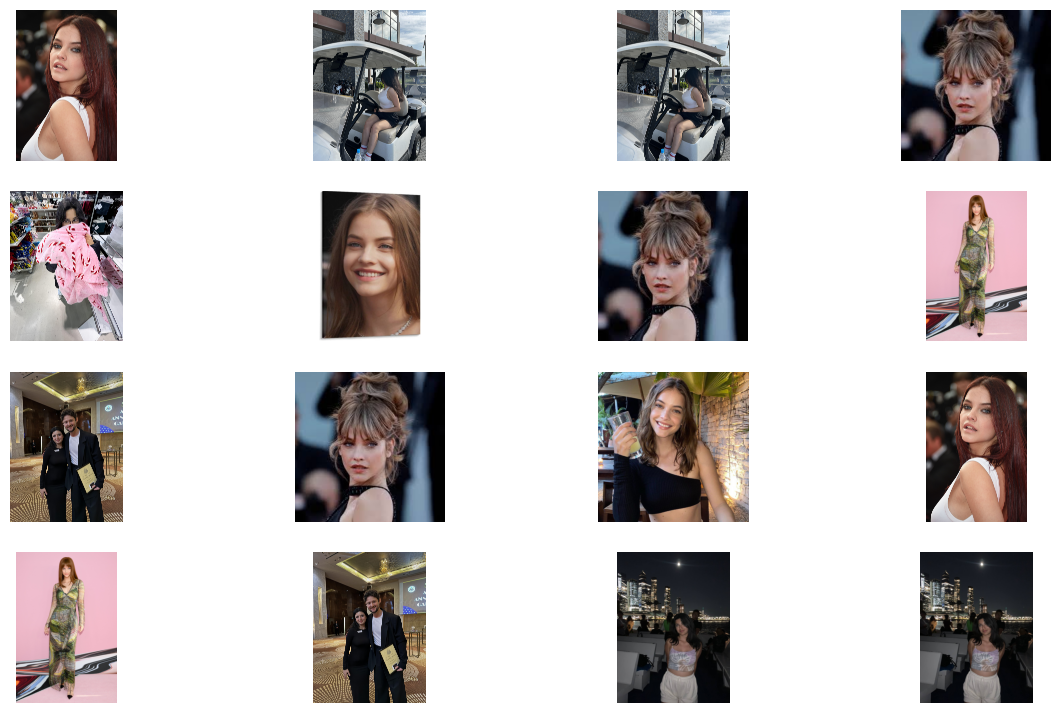

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from PIL import Image

images = []
for folder in os.listdir(train_dir):
  for image in os.listdir(train_dir+'/' + folder):
    if os.path.isfile(os.path.join(train_dir,folder,image)):
     images.append(os.path.join(train_dir,folder,image))

plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(16):
  n+=1
  random_img = random.choice(images)
  imgs = mpimg.imread(random_img)
  plt.subplot(4, 4, n)
  plt.axis('off')
  plt.imshow(imgs)

In [ ]:
#model

resnet_url = 'https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/2'

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
image_shape + (3,)

(128, 128, 3)

In [ ]:
def create_model(model_url, num_classes = 10):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = False, #we freeze this layer w False
                                           name = 'Feature_extraction_layer',
                                           input_shape = image_shape + (3,))

  model = tf.keras.Sequential([
      feature_extractor_layer,
      tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer') #1 is the number of neuron and sigmoid always have 1 neuron
  ])

  return model

In [ ]:
resnet_model = create_model(resnet_url,
                            num_classes = train_data_10_percent.num_classes)

In [ ]:
train_data_10_percent.num_classes

2

In [ ]:
resnet_model.layers[0]

In [ ]:
resnet_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ['accuracy'])

In [ ]:
resnet_history = resnet_model.fit(train_data_10_percent,
                                  batch_size = batch_size,
                                  epochs = 5,
                                  validation_data = test_data_10_percent,
                                  steps_per_epoch = len(train_data_10_percent),
                                  validation_steps = len(test_data_10_percent)
                                  # callbacks = [create_tensorboard_callback(dir_name = 'tensorflow_hub',
                                  #                                          experiment_name = 'resnet50V2')]
)

Epoch 1/5
8/8 [==============================] - 10s 470ms/step - loss: 0.9951 - accuracy: 0.4375 - val_loss: 0.2571 - val_accuracy: 1.0000
Epoch 2/5
8/8 [==============================] - 3s 341ms/step - loss: 0.3950 - accuracy: 0.7500 - val_loss: 0.1784 - val_accuracy: 1.0000
Epoch 3/5
8/8 [==============================] - 4s 521ms/step - loss: 0.1884 - accuracy: 1.0000 - val_loss: 0.1303 - val_accuracy: 1.0000
Epoch 4/5
8/8 [==============================] - 3s 326ms/step - loss: 0.0884 - accuracy: 1.0000 - val_loss: 0.1136 - val_accuracy: 1.0000
Epoch 5/5
8/8 [==============================] - 3s 333ms/step - loss: 0.0529 - accuracy: 1.0000 - val_loss: 0.1051 - val_accuracy: 1.0000
